# CS498 Project, Team 31, Phase 1
## Sentiment Analysis of Social Media as a predictor for Bitcoin price volatility

Phase 1 of the project will be to conduct a data exploration of the cryptocurrency historical datasets to ascertain if a correlation can be drawn between Bitcoin price fluctuations and the other major cryptocurrencies. The comparison will be done using the top ten cryptocurrencies by market share. The top ten were chosen based by market cap as of Dec. 7, 2017, according to CoinMarketCap.com. The historical data will be restricted to the last 90 days of the year 2017.

1. Bitcoin (BTC): \$304.52 billion
2. Ethereum (ETH): \$41.55 billion
3. Bitcoin Cash (BCH): \$22.02 billion
4. IOTA (IOT): \$11.59 billion
5. Ripple (XRP): \$8.68 billion
6. Dash (DASH): \$5.38 billion
7. Litecoin (LTC): \$5.32 billion
8. Monero (XMR): \$4.33 billion
9. Bitcoin Gold (BTG): \$4.22 billion
10. Cardano (ADA): \$2.78 billion
11. Ethereum Classic (ETC): \$2.62 billion
12. Stellar Lumens (XLM): \$2.53 billion
13. NEO (NEO): \$2.23 billion

#### Because some coins didnt start trading until late 2017, the following substitutions were made:
* Ethereum classic was exchanged for IOTA
* Stellar Lumens was exchanged for Cardano
* Neo was exchanged for Bitcoin Gold


The datasets used were downloaded from the [CryptoCompare public API](https://www.cryptocompare.com/api/#introduction), we can use the following Python wrapper available on [GitHub: cryCompare](https://github.com/stefs304/cryCompare) to simplfy the API usage.


In [2]:
# Standard Data Science libraires to be used
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import operator
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
import sys

# This path will need to be modified based on where to save the crycompare library
sys.path.append("C:/Users/Michael/notebooks/CS498/crycompare/")
from crycompare import history as h 
from crycompare import price as p 

%matplotlib inline
%matplotlib inline

In [3]:
# Fetch a coin list from CryptoCompare and create a sub list with only coins of interest.
top10_coins = ['BTC', 'ETH', 'BCH', 'ETC','XRP', 'DASH', 'LTC', 'XMR', 'NEO', 'XLM'] # The top ten coins for 2017
# It was not nessecary to fetch the coin list since it is simpler to create a list of the coins we want to fetch.
# coinList = p.coinList()
# top10_coinList = dict((k, coinList[k]) for k in top10_coins if k in coinList)
coins = sorted(top10_coins)
print(coins)

['BCH', 'BTC', 'DASH', 'ETC', 'ETH', 'LTC', 'NEO', 'XLM', 'XMR', 'XRP']


With the histoDay() function we can fetch the historical data (OHLC prices and volumes) open-high-low-close chart. This cell is now a markdown cell. Since we all ready fetch and pickeled the data down below.

```python
df_dict = {}
for coin in coins:
    histo = h.histoDay(coin, 'USD', limit=89, toTs=1514678400, allData=False)
    if histo:
        df_histo = pd.DataFrame(histo)
        df_histo['time'] = pd.to_datetime(df_histo['time'],unit='s')
        df_histo.index = df_histo['time']
        del df_histo['time']
        del df_histo['volumefrom']
        del df_histo['volumeto']
        
        df_dict[coin] = df_histo
```

In [72]:
# We store all info in a dataframe with 2-level columns: 
# the first level contains the coin names, the second one, the OHLC prices.
# top10_coin_history = pd.concat(df_dict.values(), axis=1, keys=df_dict.keys())
# We reste the indexs so the times are a column
# top10_coin_history.reset_index(level=0, inplace=True)

In [75]:
# We want to save the dataframe so we don't need to access the CryptoCompare API every time
# We are using pickle to save the data.
import pickle
# top10_coin_history.to_pickle("data/top10_coins.pkl")  

In [117]:
# Here we reload the pickled dataframe
top10_coin_history = pickle.load(open("data/top10_coins.pkl", "rb" ))
df_btc = top10_coin_history[['time', 'BTC']]

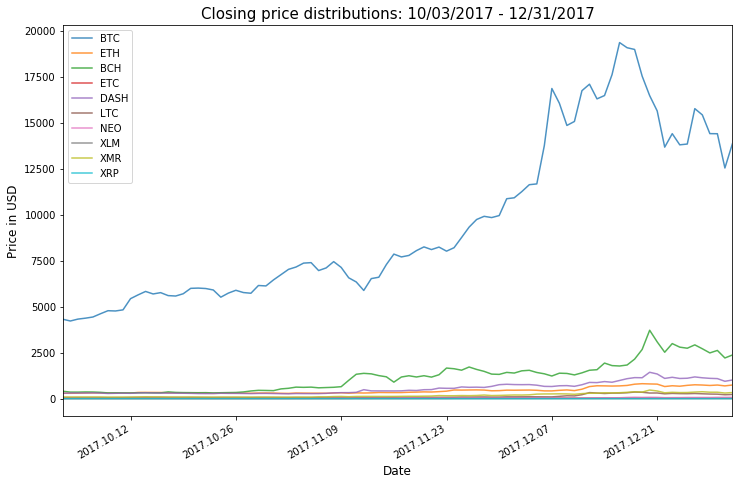

In [147]:
# The first step is to plot the closing price of our chosen crypto currencies and observe how the price has changed over time.
import matplotlib.dates as mdates
import datetime
top10_coin_history['Date_mpl'] = top10_coin_history['time'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(top10_coin_history.loc[:,'Date_mpl'], top10_coin_history.loc[:,('BTC', 'close')], alpha=0.8, color=color[0], label="BTC")
plt.plot(top10_coin_history.loc[:,'Date_mpl'], top10_coin_history.loc[:,('ETH', 'close')], alpha=0.8, color=color[1], label="ETH")
plt.plot(top10_coin_history.loc[:,'Date_mpl'], top10_coin_history.loc[:,('BCH', 'close')], alpha=0.8, color=color[2], label="BCH")
plt.plot(top10_coin_history.loc[:,'Date_mpl'], top10_coin_history.loc[:,('ETC', 'close')], alpha=0.8, color=color[3], label="ETC")
plt.plot(top10_coin_history.loc[:,'Date_mpl'], top10_coin_history.loc[:,('DASH', 'close')], alpha=0.8, color=color[4], label="DASH")
plt.plot(top10_coin_history.loc[:,'Date_mpl'], top10_coin_history.loc[:,('LTC', 'close')], alpha=0.8, color=color[5], label="LTC")
plt.plot(top10_coin_history.loc[:,'Date_mpl'], top10_coin_history.loc[:,('NEO', 'close')], alpha=0.8, color=color[6], label="NEO")
plt.plot(top10_coin_history.loc[:,'Date_mpl'], top10_coin_history.loc[:,('XLM', 'close')], alpha=0.8, color=color[7], label="XLM")
plt.plot(top10_coin_history.loc[:,'Date_mpl'], top10_coin_history.loc[:,('XMR', 'close')], alpha=0.8, color=color[8], label="XMR")
plt.plot(top10_coin_history.loc[:,'Date_mpl'], top10_coin_history.loc[:,('XRP', 'close')], alpha=0.8, color=color[9], label="XRP")
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
ax.set_xlim([datetime.date(2017, 10, 3), datetime.date(2017, 12, 31)])
ax.legend()
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distributions: 10/03/2017 - 12/31/2017", fontsize=15)
plt.show()